<a href="https://colab.research.google.com/github/fridayyy3000/Stock_forecast/blob/main/amazon_stock_price_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
data= yf.download('AMZN', start='2023-07-01', end='2024-07-01')

# Display the first few rows of the data
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300


In [ ]:
training_set = data.iloc[:,1:2].values
training_set

array([[131.8500061 ],
       [131.3999939 ],
       [128.72999573],
       [130.97000122],
       [129.27999878],
       [129.77000427],
       [131.25999451],
       [134.66999817],
       [136.6499939 ],
       [135.61999512],
       [133.86000061],
       [135.99000549],
       [134.78999329],
       [131.36999512],
       [131.66000366],
       [129.58000183],
       [129.08000183],
       [132.63000488],
       [133.00999451],
       [133.86999512],
       [133.69000244],
       [130.22999573],
       [129.83999634],
       [143.63000488],
       [142.53999329],
       [140.83999634],
       [140.32000732],
       [140.41000366],
       [139.33000183],
       [140.58999634],
       [141.27999878],
       [137.27000427],
       [136.08999634],
       [134.07000732],
       [135.19000244],
       [135.6499939 ],
       [135.94999695],
       [136.77999878],
       [133.86999512],
       [133.94999695],
       [135.13999939],
       [135.67999268],
       [138.78999329],
       [139

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

array([[0.13056275],
       [0.12480812],
       [0.09066492],
       [0.11930949],
       [0.09769821],
       [0.10396426],
       [0.12301785],
       [0.16662403],
       [0.19194367],
       [0.17877233],
       [0.15626601],
       [0.18350392],
       [0.1681585 ],
       [0.1244245 ],
       [0.12813305],
       [0.10153456],
       [0.0951407 ],
       [0.14053716],
       [0.14539636],
       [0.15639381],
       [0.15409212],
       [0.1098465 ],
       [0.1048593 ],
       [0.28120213],
       [0.26726336],
       [0.24552427],
       [0.23887479],
       [0.24002564],
       [0.22621487],
       [0.24232734],
       [0.2511509 ],
       [0.19987219],
       [0.18478258],
       [0.15895151],
       [0.1732737 ],
       [0.17915595],
       [0.1829923 ],
       [0.19360614],
       [0.15639381],
       [0.15741685],
       [0.17263428],
       [0.17953956],
       [0.21930939],
       [0.2342712 ],
       [0.20664967],
       [0.20217389],
       [0.20959079],
       [0.220

In [ ]:
training_set.size

250

In [ ]:
x_train = training_set[0:249]
y_train = training_set[1:250]

In [ ]:
x_train = np.reshape(x_train,(249,1,1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=4,activation ='sigmoid',input_shape=(None,1)))

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
8/8 [==============================] - 2s 5ms/step - loss: 0.1761
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1623
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1503
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1387
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1290
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1203
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1127
Epoch 8/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1061
Epoch 9/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1005
Epoch 10/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0957
Epoch 11/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0913
Epoch 12/200
8/8 [==============================] - 0s 6ms/step - loss: 0.0877
Epoch 13/200
8/8 [==============================] - 0s 6ms/st

In [ ]:
# test_set = data.iloc[:,1:2].values
# test_set.size

In [ ]:
# real_stock_price = test_set.copy()
# real_stock_price.size

In [ ]:
# inputs = real_stock_price
# inputs = sc.fit_transform(inputs)
# inputs = np.reshape(inputs,(250,1,1))

In [ ]:
# predicted_stock_price = regressor.predict(inputs)

In [ ]:
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(real_stock_price,color='red',label='Real Amazon Stock Price')
# plt.plot(predicted_stock_price,color='blue',label='Predicted Amazon Stock Price')
# plt.title('Amazon Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Amazon_stock_price')
# plt.legend()
# plt.show()

8/8 [==============================] - 0s 7ms/step


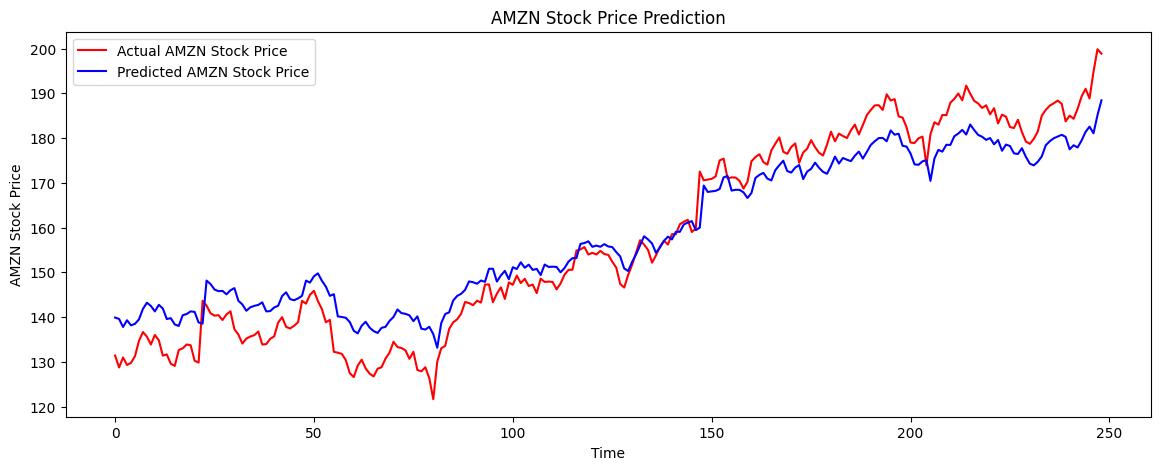

In [ ]:
import matplotlib.pyplot as plt
predicted_stock_price = regressor.predict(x_train)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Prepare actual stock prices for comparison
actual_stock_price = data.iloc[1:, 1:2].values

# Create a DataFrame to compare actual and predicted prices
comparison = pd.DataFrame({
    'Actual': actual_stock_price.flatten(),
    'Predicted': predicted_stock_price.flatten()
})

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(comparison['Actual'], color='red', label='Actual AMZN Stock Price')
plt.plot(comparison['Predicted'], color='blue', label='Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

In [ ]:
predicted_stock_price

array([[139.88469],
       [139.57843],
       [137.77759],
       [139.28651],
       [138.14622],
       [138.47568],
       [139.48332],
       [141.82109],
       [143.19756],
       [142.47983],
       [141.26192],
       [142.73724],
       [141.90411],
       [139.55804],
       [139.7553 ],
       [138.34781],
       [138.01204],
       [140.41736],
       [140.67769],
       [141.2688 ],
       [141.14487],
       [138.78583],
       [138.52283],
       [148.14775],
       [147.36565],
       [146.15218],
       [145.78262],
       [145.84653],
       [145.0812 ],
       [145.97441],
       [146.4655 ],
       [143.63129],
       [142.80688],
       [141.40666],
       [142.18127],
       [142.50069],
       [142.7094 ],
       [143.28839],
       [141.2688 ],
       [141.32393],
       [142.14659],
       [142.52155],
       [144.69983],
       [145.52724],
       [144.00304],
       [143.75743],
       [144.16466],
       [144.74217],
       [148.14055],
       [147.69534],
